In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
bikes_data = pd.read_csv('hour.csv')
bikes_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bikes_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
bikes_data['dteday'] = pd.to_datetime(bikes_data['dteday'], infer_datetime_format=True)

In [5]:
bikes_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
bikes_data.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [7]:
ml_data = bikes_data.drop(columns={'yr','holiday', 'windspeed', 'workingday', 'weekday', 'instant', 'dteday'})

In [8]:
ml_data = bikes_data

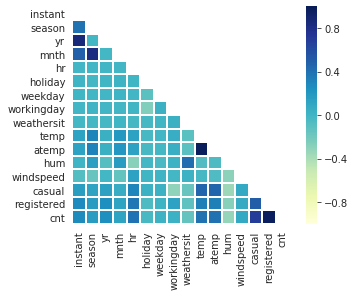

In [9]:
corr = ml_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0, mask=mask, square=True, linewidths=1, cmap='YlGnBu')


#sns.heatmap(ml_data.corr(), vmin=-1, vmax=1, center=0, linewidths=1, cmap="YlGnBu")

In [ ]:
new

In [126]:
X = ml_data.drop(columns={'cnt', 'dteday', 'temp', 'yr',
                          'instant', 'workingday',
                          'casual','registered'})
y = ml_data['cnt']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [127]:
X.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit', 'atemp',
       'hum', 'windspeed'],
      dtype='object')

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state = 29)

In [129]:
# Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

In [130]:
# Create decision tree classifer object
regr = DecisionTreeRegressor(random_state = 29)
# Train model
model = regr.fit(X_train, y_train)
# Predict observation's value  
regr.score(X_test, y_test)

0.7467744390583765

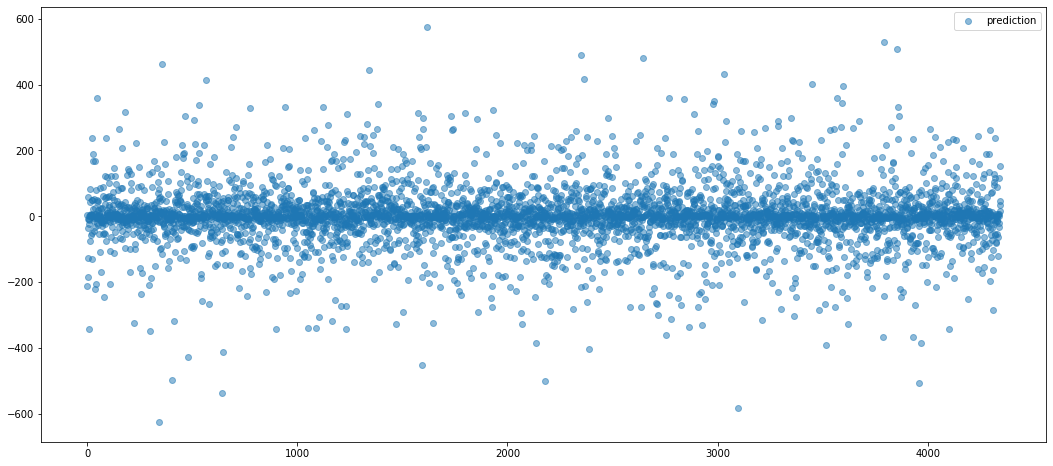

In [131]:
y_pred = regr.predict(X_test)

x_plot = list(range(len(X_test)))
plt.scatter(x_plot,y_pred-y_test, 
            label = 'prediction', alpha = 0.5)

plt.legend()
plt.show()

In [132]:
from sklearn.neighbors import KNeighborsRegressor

knnr = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
knnr.score(X_test, y_test)

0.5957264280315784

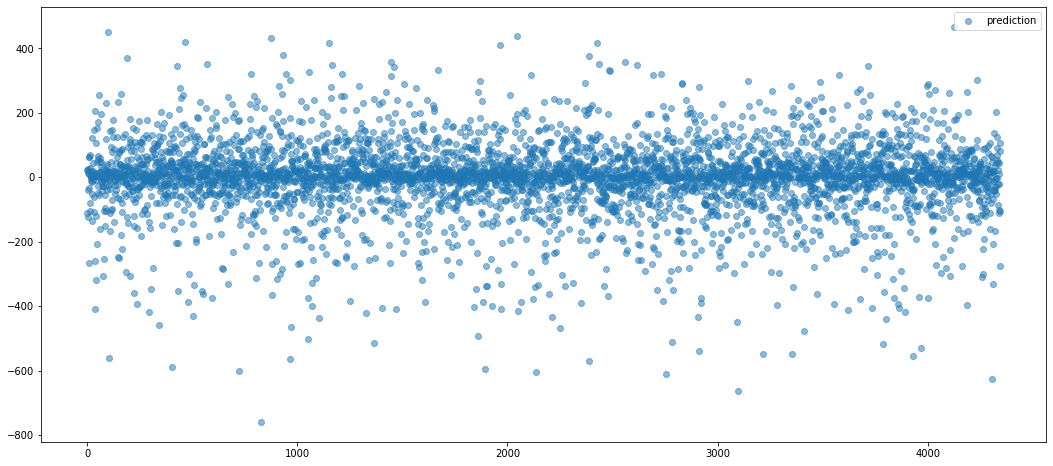

In [133]:
y_pred = knnr.predict(X_test)

x_plot = list(range(len(X_test)))
plt.scatter(x_plot,y_pred-y_test, 
            label = 'prediction', alpha = 0.5)

plt.legend()
plt.show()

In [134]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

74.77008055235903

In [135]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

13471.05500575374

In [136]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5957264280315784

# Datetime Prediction

In [59]:
bikes_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
bike_time = bikes_data.groupby('dteday')['cnt'].sum().reset_index()
bike_time = bike_time.set_index('dteday')
print (bike_time.index)
bike_time

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)


,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


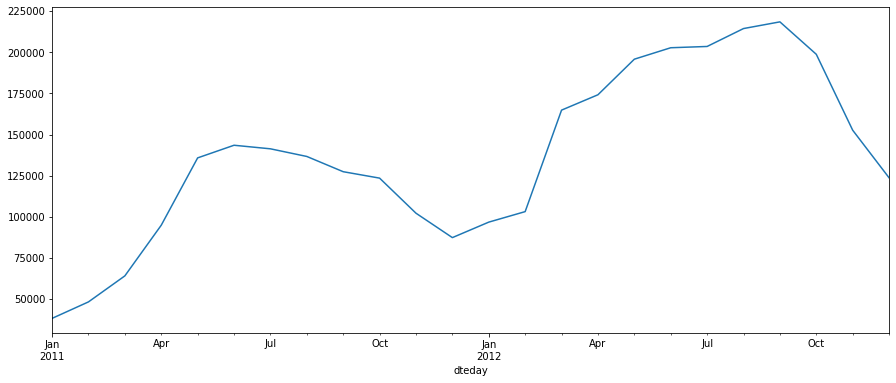

In [22]:
bike_time['cnt'].resample('MS').sum().plot(figsize=(15, 6))

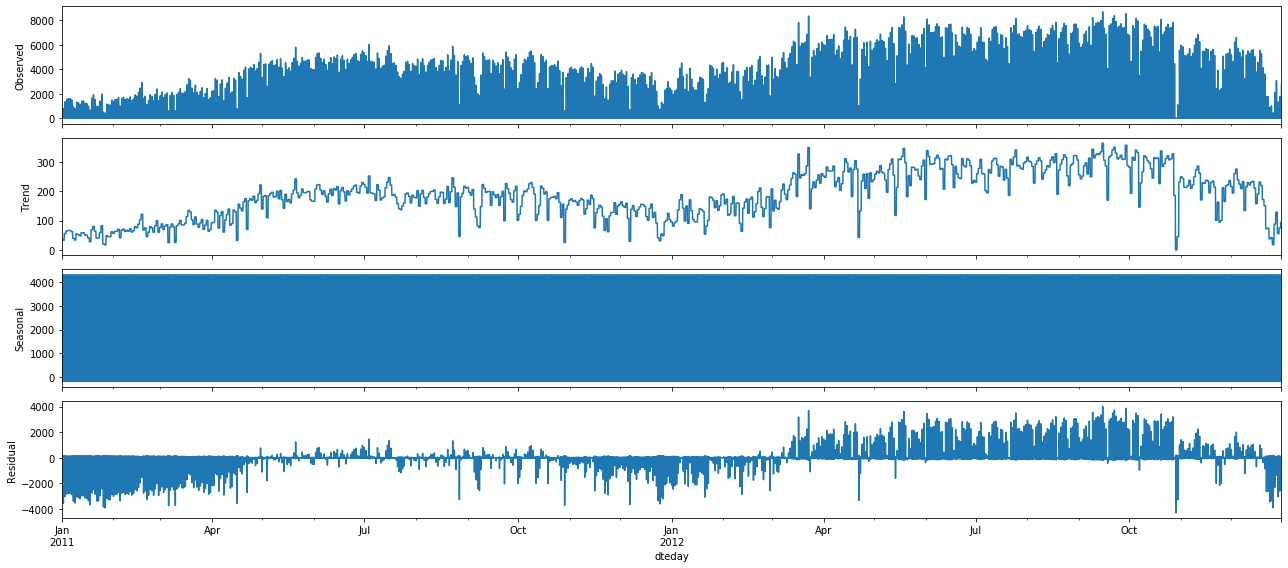

In [23]:
y = bike_time['cnt'].resample('H').sum()

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

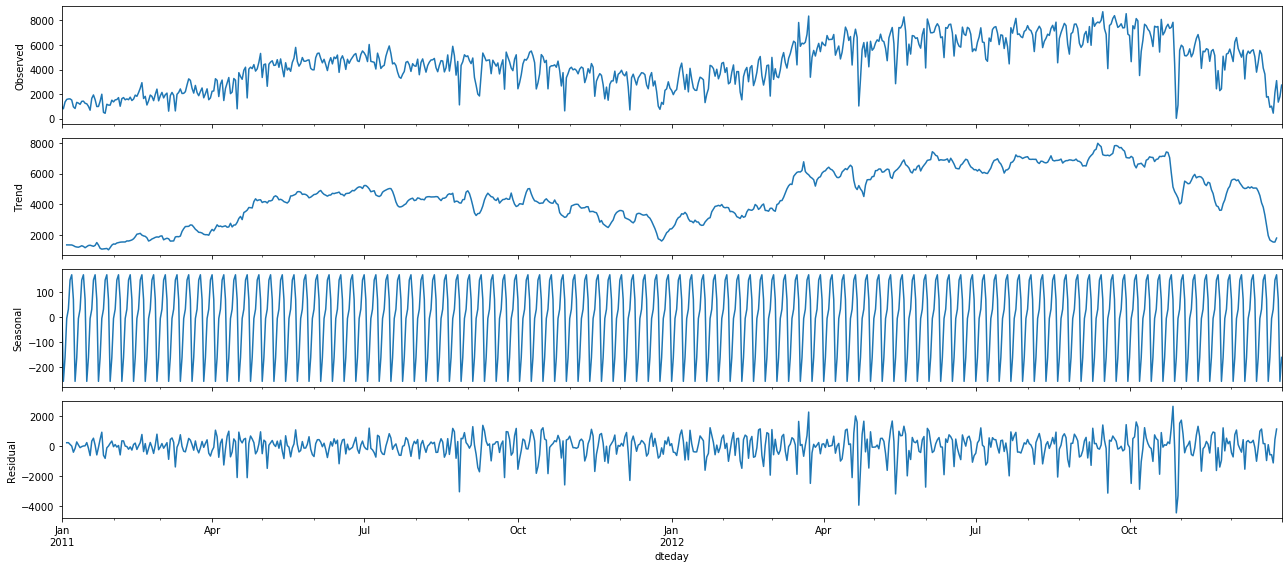

In [24]:
y = bike_time['cnt'].resample('D').mean()

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

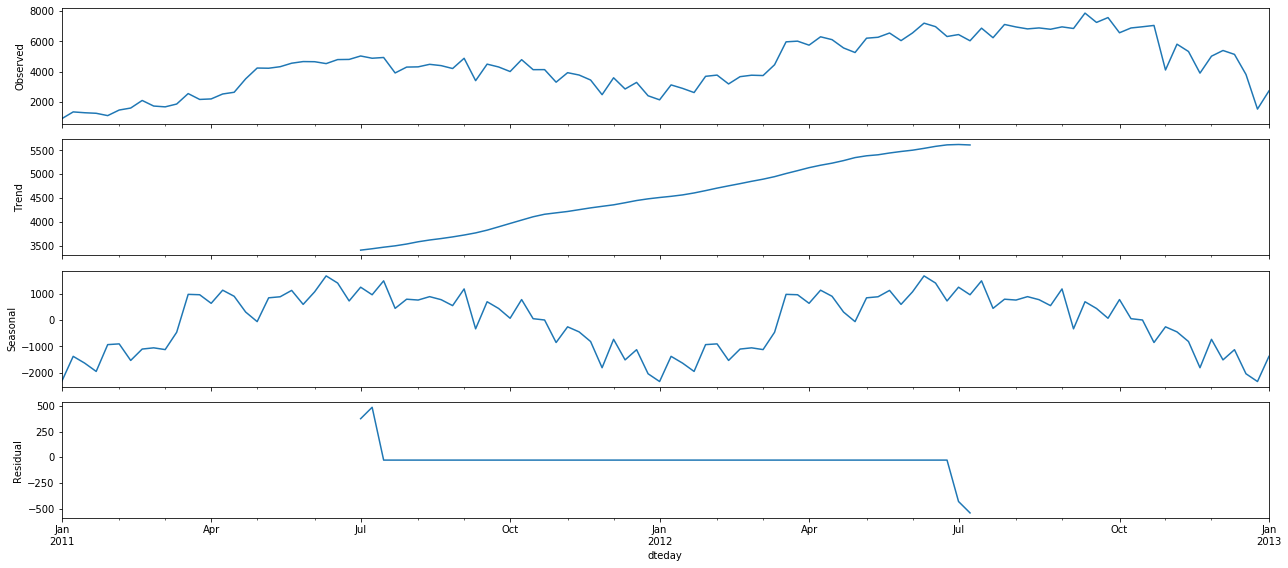

In [25]:
y = bike_time['cnt'].resample('W').mean()

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## How to find the order of differencing (d) in ARIMA model
The purpose of differencing it to make the time series stationary.
The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.
If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

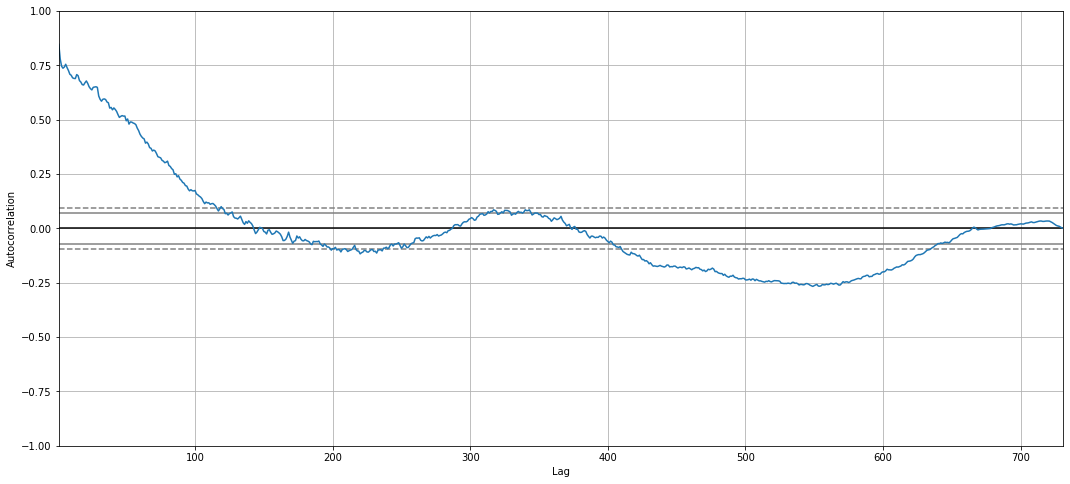

In [26]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(bike_time)
plt.show()

If there is a Positive autocorrelation at lag 1 then we use the AR model

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.
If P Value > 0.05 we go ahead with finding the order of differencing.

In [27]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(bike_time.cnt.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.877448
p-value: 0.342743


In [28]:
from pmdarima.arima.utils import ndiffs

y = bike_time.cnt

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

## How to find the order of the AR term (p)
Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                  730
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6029.309
Method:                       css-mle   S.D. of innovations            934.413
Date:                Fri, 27 Sep 2019   AIC                          12072.617
Time:                        11:54:26   BIC                          12104.768
Sample:                    01-02-2011   HQIC                         12085.021
                         - 12-31-2012                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3381     12.739      0.105      0.916     -23.630      26.307
ar.L1.D.cnt    -0.4776      0.036    -13.180      0.000      -0.549      -0.407
ar.L2.D.cnt    -0.3969      0.039    -10.219    

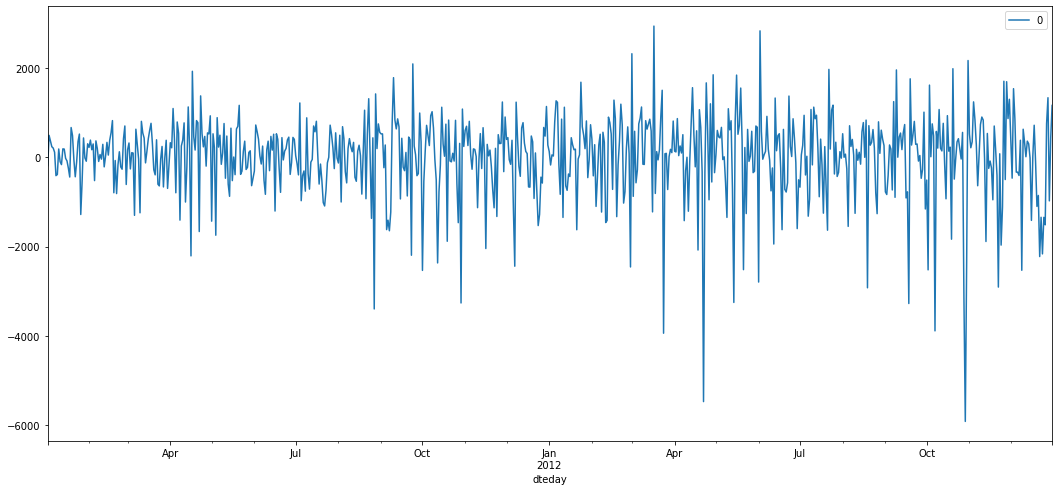

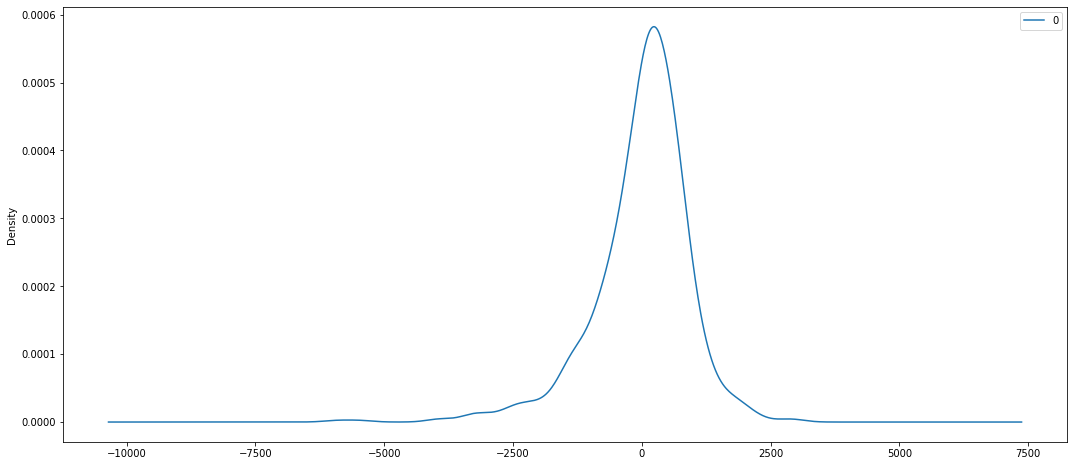

                 0
count   730.000000
mean      0.669225
std     935.103865
min   -5920.453573
25%    -387.758776
50%     137.090081
75%     531.213703
max    2942.387926


In [29]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(bike_time, order=(5,1,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=6248.927795, expected=6227.000000
predicted=6434.090546, expected=6660.000000
predicted=6499.790758, expected=7403.000000
predicted=6591.408862, expected=6241.000000
predicted=6187.807324, expected=6207.000000
predicted=6197.932257, expected=4840.000000
predicted=5720.269846, expected=4672.000000
predicted=5615.101945, expected=6569.000000
predicted=6470.503902, expected=6290.000000
predicted=6141.482881, expected=7264.000000
predicted=6548.734273, expected=7446.000000
predicted=6508.714677, expected=7499.000000
predicted=6600.450681, expected=6969.000000
predicted=6846.214566, expected=6031.000000
predicted=6498.366687, expected=6830.000000
predicted=6954.647909, expected=6786.000000
predicted=6985.609112, expected=5713.000000
predicted=6487.927905, expected=6591.000000
predicted=6693.885587, expected=5870.000000
predicted=6154.963180, expected=4459.000000
predicted=5575.168669, expected=7410.000000
predicted=6767.358281, expected=6966.000000
predicted=6430.160261, expected=

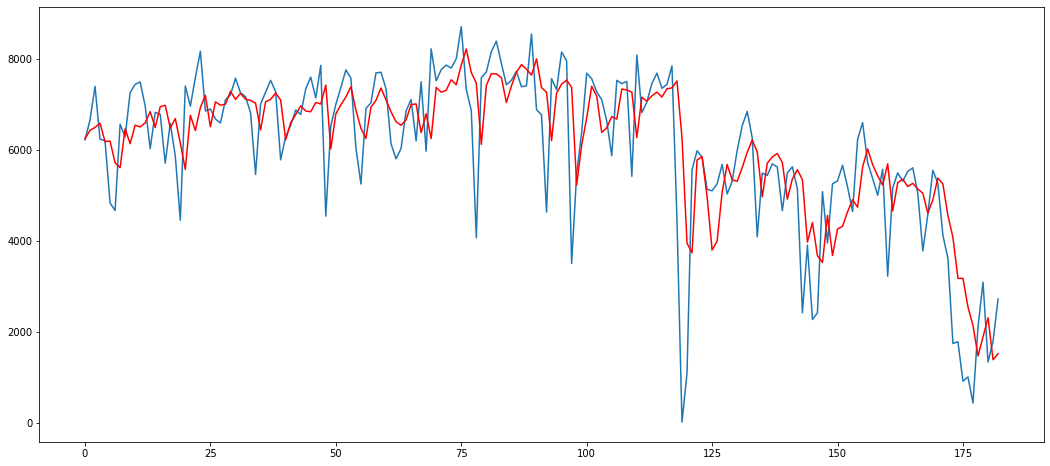

In [30]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = bike_time.values
size = int(len(X) * 0.75)   # Split percentage

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()